# Diabetes Readmission dataset
## Preliminary Work
### Import libraries

In [56]:
# Import important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import joblib

### Import dataset

In [57]:
# Read data
df = pd.read_csv("/Users/stutipande/Documents/MIT/Intro ML/diabetes-data/diabetic_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

## Feature Pre-processing and Construction
### Duplicates

In [58]:
# Remove duplicates of same patient number to enforce statistical independence
print('Total data = ', len(df))
print('Unique entries = ', len(np.unique(df['patient_nbr'])))
df.drop_duplicates(['patient_nbr'], keep = 'first', inplace = True)
print('Length after removing Duplicates:', len(df))

Total data =  101766
Unique entries =  71518
Length after removing Duplicates: 71518


### Null values

In [59]:
# Replace ?, None, N/A , Unknown and ''  with Nan so missing values are uniform
df.replace('?', np.nan, inplace=True)
df.replace('None', np.nan, inplace = True)
df.replace('N/A', np.nan, inplace = True)
df.replace(' ', np.nan, inplace = True)
df.replace('Unknown/Invalid', np.nan, inplace = True)

missing_percent = df.isnull().mean().sort_values(ascending=False)

# Return all columns showing the percentage of missing values for each
print(missing_percent)

weight                      0.960108
max_glu_serum               0.951677
A1Cresult                   0.818423
medical_specialty           0.482074
payer_code                  0.434059
race                        0.027238
diag_3                      0.017129
diag_2                      0.004111
diag_1                      0.000154
gender                      0.000042
troglitazone                0.000000
encounter_id                0.000000
miglitol                    0.000000
rosiglitazone               0.000000
pioglitazone                0.000000
tolbutamide                 0.000000
acarbose                    0.000000
citoglipton                 0.000000
tolazamide                  0.000000
examide                     0.000000
glipizide                   0.000000
insulin                     0.000000
glyburide-metformin         0.000000
glipizide-metformin         0.000000
glimepiride-pioglitazone    0.000000
metformin-rosiglitazone     0.000000
metformin-pioglitazone      0.000000
c

In [60]:
# Print number of null values are in each coluln
print(df.isna().sum())

encounter_id                    0
patient_nbr                     0
race                         1948
gender                          3
age                             0
weight                      68665
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  31043
medical_specialty           34477
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         11
diag_2                        294
diag_3                       1225
number_diagnoses                0
max_glu_serum               68062
A1Cresult                   58532
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

### Target variable

In [61]:
# Encode the target variable
print(len(df[df['readmitted'] == 'NO']['readmitted']))
print(len(df[df['readmitted'] == '>30']['readmitted']))
print(len(df[df['readmitted'] == '<30']['readmitted']))

# Change to encode
df['readmitted'] = df['readmitted'].replace('>30', 0)
df['readmitted'] = df['readmitted'].replace('<30', 1)
df['readmitted'] = df['readmitted'].replace('NO', 0)

42985
22240
6293


/var/folders/qj/32q69q7s7kjcsl3tjvxf4h3c0000gn/T/ipykernel_36340/3774129005.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['readmitted'] = df['readmitted'].replace('NO', 0)


### Missing values
From the above, High Missing Values:
weight                      0.968585
max_glu_serum               0.947468
A1Cresult                   0.832773
    
The glucose serum test result and hemoglobin AIC result are more important measures for diabetes patients. Whilst there are a high percentage of missing values in both, we will classify NA as Not available
these two have a lot of missing values so we drop them
medical_specialty           0.490822 - but this is an important feature so we will not drop it
payer_code                  0.395574

encounter_id - has a unique value for each instance
of the 101766 instances, 71518 are uniqe patient_nbr. Drop since we are only sampling from 5000 instances. 

The following columns have the same value for all instances - Drop
examide 1
citoglipton 1
glimepiride-pioglitazone 1

Drop all 

In [62]:
# Drop redundant features and those with a high percentage of missing values
to_drop = ['weight', 'encounter_id', 'patient_nbr', 'examide', 'citoglipton', 'glimepiride-pioglitazone', 'payer_code' ]
df = df.drop(columns = to_drop, axis=1)


### A1C and Glucose Serum test result
A1C result and max_glu_serum have several missing values, however are important features when understand risk of readmission for diabetes patients. These missing values may suggest that no XXX was prescribed. Therefore, we keep these two featues and convert their missing values to 'Not Available'

In [63]:

df.loc[df.A1Cresult.isna(), 'A1Cresult'] = 'Not Available'
df.loc[df.max_glu_serum.isna(), 'max_glu_serum'] = 'Not Available'
df['A1Cresult'].unique() #['Not Available', '>7', '>8', 'Norm']
df['max_glu_serum'].unique() #[]'Not Available', '>300', 'Norm', '>200'

df['A1Cresult']=df['A1Cresult'].replace("Not Available", 0)
df['A1Cresult']=df['A1Cresult'].replace("Norm", 1)
df['A1Cresult']=df['A1Cresult'].replace(">7", 2)
df['A1Cresult']=df['A1Cresult'].replace(">8", 3)

df['max_glu_serum']=df['max_glu_serum'].replace("Not Available", 0)
df['max_glu_serum']=df['max_glu_serum'].replace("Norm", 1)
df['max_glu_serum']=df['max_glu_serum'].replace(">200", 2)
df['max_glu_serum']=df['max_glu_serum'].replace(">300", 3)

/var/folders/qj/32q69q7s7kjcsl3tjvxf4h3c0000gn/T/ipykernel_36340/2150135197.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['A1Cresult']=df['A1Cresult'].replace(">8", 3)
/var/folders/qj/32q69q7s7kjcsl3tjvxf4h3c0000gn/T/ipykernel_36340/2150135197.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['max_glu_serum']=df['max_glu_serum'].replace(">300", 3)


### Gender

In [64]:
# There are 3 instances of unknown gender -drop these
print(sum(df['gender'].isna()))
df = df.dropna(subset = ['gender'])
df.info()

3
<class 'pandas.core.frame.DataFrame'>
Index: 71515 entries, 0 to 101765
Data columns (total 43 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race                      69569 non-null  object
 1   gender                    71515 non-null  object
 2   age                       71515 non-null  object
 3   admission_type_id         71515 non-null  int64 
 4   discharge_disposition_id  71515 non-null  int64 
 5   admission_source_id       71515 non-null  int64 
 6   time_in_hospital          71515 non-null  int64 
 7   medical_specialty         37040 non-null  object
 8   num_lab_procedures        71515 non-null  int64 
 9   num_procedures            71515 non-null  int64 
 10  num_medications           71515 non-null  int64 
 11  number_outpatient         71515 non-null  int64 
 12  number_emergency          71515 non-null  int64 
 13  number_inpatient          71515 non-null  int64 
 14  diag_1                  

In [65]:
# One hot encode

df = pd.get_dummies(df, columns = ['gender'], drop_first = True)
df.head()

,race,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,gender_Male
0,Caucasian,[0-10),6,25,1,1,Pediatrics-Endocrinology,41,0,1,...,No,No,No,No,No,No,No,No,0,False
1,Caucasian,[10-20),1,1,7,3,NaN,59,0,18,...,No,Up,No,No,No,No,Ch,Yes,0,False
2,AfricanAmerican,[20-30),1,1,7,2,NaN,11,5,13,...,No,No,No,No,No,No,No,Yes,0,False
3,Caucasian,[30-40),1,1,7,2,NaN,44,1,16,...,No,Up,No,No,No,No,Ch,Yes,0,True
4,Caucasian,[40-50),1,1,7,1,NaN,51,0,8,...,No,Steady,No,No,No,No,Ch,Yes,0,True


### Age

In [66]:
mapAge = {'[0-10)': 5,
               '[10-20)': 15,
               '[20-30)': 25, 
               '[30-40)': 35,
               '[40-50)': 45, 
               '[50-60)': 55,
               '[60-70)': 65,
               '[70-80)': 75,
               '[80-90)': 85,
               '[90-100)': 95}

df['age'] = df['age'].replace(mapAge)
print(df['age'].head())

0     5
1    15
2    25
3    35
4    45
Name: age, dtype: int64


/var/folders/qj/32q69q7s7kjcsl3tjvxf4h3c0000gn/T/ipykernel_36340/146006108.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['age'] = df['age'].replace(mapAge)


### Medical Specialty
Write something about the K fold technique used to make these features whilst preventing data leakage

In [67]:
# Medical Specialty - 71 unique specialties. too many to one hot encode.
# Group into buckets
df = df[df['medical_specialty'].notna()]

pd.set_option('display.max_rows', 1000)
print(df['medical_specialty'].value_counts())

# From the value counts, group the specialties based on frequency


medical_specialty
InternalMedicine                        10919
Family/GeneralPractice                   5118
Emergency/Trauma                         4465
Cardiology                               4265
Surgery-General                          2221
Orthopedics                              1134
Orthopedics-Reconstructive               1043
Radiologist                               831
Nephrology                                828
Pulmonology                               653
Psychiatry                                614
ObstetricsandGynecology                   595
Urology                                   530
Surgery-Cardiovascular/Thoracic           497
Surgery-Neuro                             409
Gastroenterology                          398
Surgery-Vascular                          362
Oncology                                  218
Pediatrics                                196
PhysicalMedicineandRehabilitation         194
Neurology                                 168
Pediatrics-Endoc

In [68]:
from sklearn.preprocessing import TargetEncoder
from sklearn.model_selection import KFold

# Group mapping medical_specialty
# Define specialty groups
specialty_groups = {
    # Diabetes-related
    "Endocrinology": "Diabetes",
    "Endocrinology-Metabolism": "Diabetes",
    "Pediatrics-Endocrinology": "Diabetes",
  

    # Internal
    "InternalMedicine": "Internal",
    "Nephrology": "Internal",
    "Pulmonology": "Internal",
    "Gastroenterology": "Internal",
    "Hematology": "Internal",
    "Hematology/Oncology": "Internal",
    "InfectiousDiseases": "Internal",
    "Oncology": "Internal",
    "Hospitalist": "Internal",
    "Pathology": "Internal",
    "Rheumatology": "Internal",
    "AllergyandImmunology": "Internal",
    "Cardiology": "Internal",
    "Neurology": "Internal",
    "Neurophysiology": "Internal",

    # Surgical
    "Surgery-General": "Surgical",
    "Orthopedics": "Surgical",
    "Orthopedics-Reconstructive": "Surgical",
    "Surgery-Cardiovascular/Thoracic": "Surgical",
    "Surgery-Cardiovascular": "Surgical",
    "Surgery-Neuro": "Surgical",
    "Surgery-Vascular": "Surgical",
    "Surgery-Thoracic": "Surgical",
    "Surgery-Pediatric": "Surgical",
    "Surgery-Maxillofacial": "Surgical",
    "Surgery-Colon&Rectal": "Surgical",
    "Surgery-Plastic": "Surgical",
    "Surgery-PlasticwithinHeadandNeck": "Surgical",
    "Surgeon": "Surgical",
    "SurgicalSpecialty": "Surgical",
    "Proctology": "Surgical",
    "Podiatry": "Surgical",
    "Ophthalmology": "Surgical",
    "Otolaryngology": "Surgical",
    "Urology": "Surgical",
    "Anesthesiology": "Surgical",
    "Anesthesiology-Pediatric": "Surgical",
    "Dentistry": "Surgical",

    # Primary Care
    "Family/GeneralPractice": "PrimaryCare",
    "Emergency/Trauma": "PrimaryCare",
    "PhysicianNotFound": "PrimaryCare",
    "Resident": "PrimaryCare",
    "DCPTEAM": "PrimaryCare",
    "OutreachServices": "PrimaryCare",

    # Pediatrics
    "Pediatrics": "Pediatrics",
    "Pediatrics-CriticalCare": "Pediatrics",
    "Pediatrics-Neurology": "Pediatrics",
    "Pediatrics-Pulmonology": "Pediatrics",
    "Pediatrics-Hematology-Oncology": "Pediatrics",
    "Pediatrics-EmergencyMedicine": "Pediatrics",
    "Cardiology-Pediatric": "Pediatrics",
    "Anesthesiology-Pediatric": "Pediatrics",
    "Perinatology": "Pediatrics",

    # OB-GYN
    "ObstetricsandGynecology": "OBGYN",
    "Gynecology": "OBGYN",
    "Obstetrics": "OBGYN",
    "Obsterics&Gynecology-GynecologicOnco": "OBGYN",

    # Psychiatry
    "Psychiatry": "Psychiatry",
    "Psychology": "Psychiatry",
    "Psychiatry-Child/Adolescent": "Psychiatry",
    "Psychiatry-Addictive": "Psychiatry",

    # Other
    "Dermatology": "Other",
    "Speech": "Other",
    "Osteopath": "Other",
    "Radiologist": "Other",
    "Radiology": "Other",
    "SportsMedicine": "Other"
}

# Apply grouping
df['specialty_group'] = df['medical_specialty'].map(specialty_groups).fillna('Other')

# Use target encoding to encode these values - preserves cardinality.
encoder = TargetEncoder(
    cv=5,  
    target_type='binary',
    smooth=10,
    random_state=42
)

df['specialty_encoded'] = encoder.fit_transform(
    df[['specialty_group']], 
    df['readmitted']           # target column
)

# 3. VERIFY RESULTS
print("\nFirst 10 encoded values:")
df = df.drop(columns=['medical_specialty'], axis=1)
print(df[[ 'specialty_group', 'specialty_encoded']].head(10))



First 10 encoded values:
   specialty_group  specialty_encoded
0         Diabetes           0.028717
9         Internal           0.091721
12     PrimaryCare           0.086379
13     PrimaryCare           0.085274
17        Internal           0.091334
26        Internal           0.090450
27        Surgical           0.079428
29        Internal           0.092465
32     PrimaryCare           0.085707
35        Internal           0.092465


### Change

In [69]:

df['change'] = df['change'].map({'No': 0, 'Ch': 1})
print(df['change'].head())

0     0
9     1
12    1
13    0
17    0
Name: change, dtype: int64


### Glucose Management Score

In [ ]:
def glucose_score(row):
    if row['diabetesMed'] == 'No':
        return 0
    elif row['change'] == 0: # No change
        return 1
    elif row['change'] == 'Ch': #Change
        return 2
    else:
        return 1  # default if unclear

df['glucose_mgmt_score'] = df.apply(glucose_score, axis=1)
df['glucose_mgmt_score']

0         0
9         1
12        1
13        1
17        1
         ..
101719    1
101720    1
101724    1
101725    1
101749    1
Name: glucose_mgmt_score, Length: 37040, dtype: int64

### Medications

#### Feature Engineering 
Check correlation between medication adn diabetes medication

In [71]:
from sklearn.preprocessing import OrdinalEncoder
# Checking correlation of meds with diabetes medication prescribed
med_columns = [
    'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
    'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
    'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'insulin', 'glyburide-metformin',
    'glipizide-metformin', 
    'metformin-rosiglitazone', 'metformin-pioglitazone'
]

encoder = OrdinalEncoder()
med_df = df[med_columns + ['diabetesMed']].copy()

med_df_encoded = pd.DataFrame(
    encoder.fit_transform(med_df),
    columns=med_df.columns,
    dtype = int
)
correlations = med_df_encoded.corr()

# Get correlation between each medication and 'diabetesMed'
corr_with_diabetesMed = correlations['diabetesMed'].drop('diabetesMed')

# Sort for easier interpretation
corr_with_diabetesMed_sorted = corr_with_diabetesMed.sort_values(ascending=False)

print(corr_with_diabetesMed_sorted)


insulin                    0.270118
metformin                  0.262453
glipizide                  0.197206
glyburide                  0.165225
pioglitazone               0.149281
rosiglitazone              0.147676
glimepiride                0.125508
repaglinide                0.067524
nateglinide                0.048268
glyburide-metformin        0.046326
acarbose                   0.027515
chlorpropamide             0.015875
tolazamide                 0.011973
miglitol                   0.011615
tolbutamide                0.007112
troglitazone               0.004106
metformin-pioglitazone     0.002903
glipizide-metformin        0.002903
acetohexamide                   NaN
metformin-rosiglitazone         NaN
Name: diabetesMed, dtype: float64


In [72]:
# Keep medications where correlation with insulin is >0.1
selected_meds = corr_with_diabetesMed[corr_with_diabetesMed > 0.1].index.tolist()
df= df.drop(columns=[col for col in med_columns if col not in selected_meds])
print(selected_meds)

['metformin', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'insulin']


In [73]:

# Total dosage adjustments across all meds
df['total_med_changes'] = df[selected_meds].apply(
    lambda x: x.isin(['Up', 'Down']).sum(), 
    axis=1
)

#  Binary flag if insulin was changed

df['insulin_changed'] = df['insulin'].isin(['Up', 'Down']).astype(int)

# F Ratio of changed medications to prescribed medications
def calculate_change_ratio(row):
    prescribed = sum(row[selected_meds] != 'No')  # Count of prescribed meds
    changed = sum(row[selected_meds].isin(['Up', 'Down']))  # Count of changes
    return changed / prescribed if prescribed > 0 else 0

df['med_change_ratio'] = df.apply(calculate_change_ratio, axis=1)

# Handling potential division by zero
df['med_change_ratio'] = df['med_change_ratio'].fillna(0)
print(df[['change', 'total_med_changes', 
          'insulin_changed', 'med_change_ratio']].describe())




             change  total_med_changes  insulin_changed  med_change_ratio
count  37040.000000       37040.000000     37040.000000      37040.000000
mean       0.445707           0.256938         0.199055          0.185284
std        0.497050           0.471371         0.399295          0.355315
min        0.000000           0.000000         0.000000          0.000000
25%        0.000000           0.000000         0.000000          0.000000
50%        0.000000           0.000000         0.000000          0.000000
75%        1.000000           0.000000         0.000000          0.000000
max        1.000000           4.000000         1.000000          1.000000


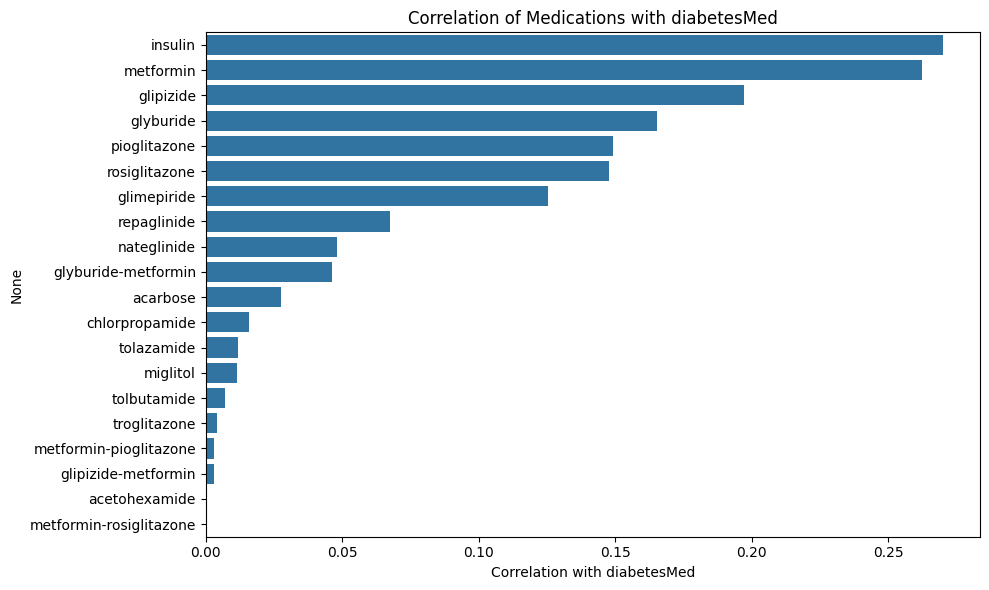

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x=corr_with_diabetesMed_sorted.values, y=corr_with_diabetesMed_sorted.index)
plt.xlabel('Correlation with diabetesMed')
plt.title('Correlation of Medications with diabetesMed')
plt.tight_layout()
plt.show()


In [76]:
# One hot encode the medication
df = pd.get_dummies(df, columns = [i for i in selected_meds], drop_first = True, dtype=int)
df.head()

,race,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,glyburide_Up,pioglitazone_No,pioglitazone_Steady,pioglitazone_Up,rosiglitazone_No,rosiglitazone_Steady,rosiglitazone_Up,insulin_No,insulin_Steady,insulin_Up
0,Caucasian,5,6,25,1,1,41,0,1,0,...,0,1,0,0,1,0,0,1,0,0
9,Caucasian,95,3,3,4,12,33,3,18,0,...,0,1,0,0,0,1,0,0,1,0
12,Caucasian,45,1,3,7,7,60,0,15,0,...,0,1,0,0,1,0,0,0,0,0
13,Caucasian,85,1,6,7,10,55,1,31,0,...,0,1,0,0,1,0,0,0,1,0
17,Caucasian,55,1,1,7,3,29,0,11,0,...,0,1,0,0,1,0,0,1,0,0


### Diagnosis

In [77]:

# Drop the NA values from the diagnosis features
drop_nan = df[
    df['diag_1'].isna() |
    df['diag_2'].isna() |
    df['diag_3'].isna()
].index

df = df.drop(drop_nan)
print(f"Rows to drop: {len(drop_nan)}")
df.info()
print(df['diag_1'].unique())


Rows to drop: 912
<class 'pandas.core.frame.DataFrame'>
Index: 36128 entries, 9 to 101749
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   race                      35236 non-null  object 
 1   age                       36128 non-null  int64  
 2   admission_type_id         36128 non-null  int64  
 3   discharge_disposition_id  36128 non-null  int64  
 4   admission_source_id       36128 non-null  int64  
 5   time_in_hospital          36128 non-null  int64  
 6   num_lab_procedures        36128 non-null  int64  
 7   num_procedures            36128 non-null  int64  
 8   num_medications           36128 non-null  int64  
 9   number_outpatient         36128 non-null  int64  
 10  number_emergency          36128 non-null  int64  
 11  number_inpatient          36128 non-null  int64  
 12  diag_1                    36128 non-null  object 
 13  diag_2                    36128 non-null  objec

In [78]:

def map_diagnosis_code(x):
    """
    Categorizes ICD-9 diagnosis codes into broader categories
    Handles numeric codes, V codes, E codes, and missing/unknown values
    """
    try:
        # Handle missing/unknown values and string codes
        if pd.isna(x) or str(x).strip() in ['', '?', 'unknown']:
            return 'other'
        
        # # There are some values like V51, V54,V60, E909
        if str(x).startswith(('V', 'E')):
            return 'other'
        
        # Convert to float then int to handle both strings and numbers
        code = int(float(x))
        
        # ICD-9 code ranges (https://www.icd9data.com/)
        if 390 <= code <= 459 or code == 785:
            return 'circulatory'
        elif 460 <= code <= 519 or code == 786:
            return 'respiratory'
        elif 520 <= code <= 579 or code == 787:
            return 'digestive'
        elif code == 250:
            return 'diabetes'
        elif 800 <= code <= 999:
            return 'injury'
        elif 710 <= code <= 739:
            return 'musculoskeletal'
        elif 580 <= code <= 629 or code == 788:
            return 'genitourinary'
        elif 140 <= code <= 239:
            return 'neoplasms'
        elif 630 <= code <= 679:
            return 'pregnancy'
        else:
            return 'other'
    except (ValueError, TypeError):
        return 'other'

# Apply to all diagnosis columns 
for col in ['diag_1', 'diag_2', 'diag_3']:
    print(f"Unique values in {col} before mapping:", len(df[col].unique()))
    df[col] = df[col].apply(map_diagnosis_code)
    print(f"Categories in {col} after mapping:", df[col].unique())
    


Unique values in diag_1 before mapping: 626
Categories in diag_1 after mapping: ['circulatory' 'other' 'injury' 'neoplasms' 'musculoskeletal'
 'genitourinary' 'digestive' 'diabetes' 'respiratory' 'pregnancy']
Unique values in diag_2 before mapping: 624
Categories in diag_2 after mapping: ['neoplasms' 'diabetes' 'circulatory' 'genitourinary' 'injury'
 'respiratory' 'other' 'digestive' 'musculoskeletal' 'pregnancy']
Unique values in diag_3 before mapping: 662
Categories in diag_3 after mapping: ['respiratory' 'diabetes' 'circulatory' 'other' 'digestive'
 'genitourinary' 'musculoskeletal' 'pregnancy' 'injury' 'neoplasms']


In [79]:
# Encode to reduce multicollinearity
df = pd.get_dummies(
    df, 
    columns=['diag_1', 'diag_2', 'diag_3'], 
    prefix=['diag1', 'diag2', 'diag3'],
    drop_first=True,
    dtype = int 

)



### Number of inpatient, outpatient and emergency visits

In [80]:

# Applying square root transformation on right skewed count data - reduce effect of large values

df['number_inpatient'] = df['number_inpatient'].apply(lambda x: np.sqrt(x+0.5))
df['number_outpatient'] = df['number_outpatient'].apply(lambda x: np.sqrt(x+0.5))
df['number_emergency'] = df['number_emergency'].apply(lambda x: np.sqrt(x+0.5))

### Race

In [81]:
# Map race to 3 categories since there are very few of Asian, Hispanic, Other. Make this category 'Other'

race_mapped = {"Asian": "Other", "Hispanic": "Other"}
df['race'] = df['race'].replace(race_mapped)

# Make race categorical with Caucasian first
df['race'] = pd.Categorical(df['race'], categories=['Caucasian', 'AfricanAmerican', 'Other'], ordered=True)

In [82]:
print(df.isnull().sum())

race                        892
age                           0
admission_type_id             0
discharge_disposition_id      0
admission_source_id           0
time_in_hospital              0
num_lab_procedures            0
num_procedures                0
num_medications               0
number_outpatient             0
number_emergency              0
number_inpatient              0
number_diagnoses              0
max_glu_serum                 0
A1Cresult                     0
change                        0
diabetesMed                   0
readmitted                    0
gender_Male                   0
specialty_group               0
specialty_encoded             0
glucose_mgmt_score            0
total_med_changes             0
insulin_changed               0
med_change_ratio              0
metformin_No                  0
metformin_Steady              0
metformin_Up                  0
glimepiride_No                0
glimepiride_Steady            0
glimepiride_Up                0
glipizid

In [83]:
# Drop all the null values
print(df.shape)
df = df.dropna()
print(df.shape)

(36128, 73)
(35236, 73)


In [84]:
for cols in df:
    print(cols, len(df[cols].unique()))

race 3
age 10
admission_type_id 7
discharge_disposition_id 25
admission_source_id 14
time_in_hospital 14
num_lab_procedures 115
num_procedures 7
num_medications 75
number_outpatient 20
number_emergency 14
number_inpatient 12
number_diagnoses 12
max_glu_serum 4
A1Cresult 4
change 2
diabetesMed 2
readmitted 2
gender_Male 2
specialty_group 8
specialty_encoded 39
glucose_mgmt_score 2
total_med_changes 5
insulin_changed 2
med_change_ratio 9
metformin_No 2
metformin_Steady 2
metformin_Up 2
glimepiride_No 2
glimepiride_Steady 2
glimepiride_Up 2
glipizide_No 2
glipizide_Steady 2
glipizide_Up 2
glyburide_No 2
glyburide_Steady 2
glyburide_Up 2
pioglitazone_No 2
pioglitazone_Steady 2
pioglitazone_Up 2
rosiglitazone_No 2
rosiglitazone_Steady 2
rosiglitazone_Up 2
insulin_No 2
insulin_Steady 2
insulin_Up 2
diag1_diabetes 2
diag1_digestive 2
diag1_genitourinary 2
diag1_injury 2
diag1_musculoskeletal 2
diag1_neoplasms 2
diag1_other 2
diag1_pregnancy 2
diag1_respiratory 2
diag2_diabetes 2
diag2_digesti

### Feature Construction

In [85]:
#Feature construction
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import KBinsDiscretizer


df['num_visits'] =  df['number_emergency'] + df['number_inpatient'] + df['number_outpatient']
df['health_index'] = 1 / (1 + df['number_emergency'] + df['number_inpatient'] + df['number_outpatient'])


total = df['time_in_hospital'].sum() + df['num_procedures'].sum() + \
                              df['num_medications'].sum() + df['num_lab_procedures'].sum() + \
                              df['number_diagnoses'].sum()


df['total_procedures']= df['num_lab_procedures']+ df['num_procedures'] + df['num_medications']
# 2. Log transform skewed features
df['log_time_in_hospital'] = np.log1p(df['time_in_hospital'])
df['log_num_lab_procedures'] = np.log1p(df['num_lab_procedures'])

discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')
df['health_index_binned'] = discretizer.fit_transform(df[['health_index']])
df['medications_per_day'] = df['num_medications'] / (df['time_in_hospital'] + 0.1)

# Interaction features
df['med_diag_interaction'] = df['num_medications'] * df['number_diagnoses']
df['chronic_index'] = df['number_inpatient'] + 2 * df['number_emergency']
df['new_med_or_change'] = ((df['change'] == 1) | (df['diabetesMed'] == 1))


df = df.drop(columns=['time_in_hospital', 'num_lab_procedures', 'health_index'])


/opt/miniconda3/lib/python3.12/site-packages/sklearn/preprocessing/_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(


In [86]:
# Convert admission type id to admission type (purpose of admission). There are 7 unique values [1,2,3,4,5,6,8]
'''
    1: "Emergency",
    2: "Urgent",
    3: "Elective",
    4: "Newborn",
    5: "Trauma Center",
    6: "Other",
    8: "Not Available"
'''
# Make 3 categories  
admission_type_map = {
    1: "Emergency",    # Emergency
    2: "Emergency",    # Urgent - considered unscheduled/emergent
    5: "Emergency",    # Trauma Center - emergent

    3: "Scheduled",    # Elective - planned admission

    4: "Other",        # Newborn
    6: "Other",        # Other
    8: "Other",        # Not Available
}

# Create new feature called admission type and drop admission type id
df['admission_type']= df['admission_type_id'].map(admission_type_map)
print(df['admission_type'])
df.drop(columns=['admission_type_id'], inplace=True)

9         Scheduled
12        Emergency
13        Emergency
17        Emergency
26        Emergency
            ...    
101716    Emergency
101720    Emergency
101724        Other
101725    Emergency
101749    Scheduled
Name: admission_type, Length: 35236, dtype: object


### Discharge Disposition
There are 25 unique values in discharge_disposition_id . Map them to the discharge disposition map
Drop expired/hospice columns as there is no chance these patients will readmit

In [87]:

conditions_to_drop = [11,12,16,17,18,19,20]


'''
    1: "Discharged to home",
    2: "Discharged to short-term hospital",
    3: "Discharged to SNF",
    4: "Discharged to ICF",
    5: "Discharged to another facility",
    6: "Discharged home with home health",
    7: "Left against medical advice",
    8: "Discharged home with HHA",
    9: "Admitted as inpatient",
    10: "To psychiatric hospital",
    11: "To hospice (home)",
    12: "To hospice (facility)",
    13: "To long-term care hospital",
    14: "To other institution",
    15: "Not mapped",
    16: "Expired",
    17: "Expired at facility",
    18: "Expired at home",
    19: "Expired - place unknown",
    20: "Expired - medical examiner",
    22: "To rehab facility",
    23: "To long-term hospital",
    24: "To Medicaid nursing facility",
    25: "To critical access hospital",
    28: "Not available"
'''

# Based on the above map, make a new map - grouping similar reasons
discharge_disposition_map = {
    1: "Home",
    6: "Home",
    8: "Home",

    3: "Care Facility",
    4: "Care Facility",
    5: "Care Facility",
    13: "Care Facility",
    14: "Care Facility",
    22: "Care Facility",
    23: "Care Facility", 
    24: "Care Facility",
    

    2: "Hospital",
    9: "Hospital",
    10: "Hospital",
    25: "Hospital",

    16: "Expired/Hospice",
    17: "Expired/Hospice",
    18: "Expired/Hospice",
    19: "Expired/Hospice",
    20: "Expired/Hospice",
    11: "Expired/Hospice",
    12: "Expired/Hospice",

    7: "Other/Unknown",
    15: "Other/Unknown",
    28: "Other/Unknown"
}

df['discharge_disposition'] = df['discharge_disposition_id'].map(discharge_disposition_map)
df = df[~df['discharge_disposition'].isin(['Expired/Hospice'])]
df = df.drop(columns = ['discharge_disposition_id'])
df.head()



,race,age,admission_source_id,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,...,total_procedures,log_time_in_hospital,log_num_lab_procedures,health_index_binned,medications_per_day,med_diag_interaction,chronic_index,new_med_or_change,admission_type,discharge_disposition
9,Caucasian,95,4,3,18,0.707107,0.707107,0.707107,8,0,...,54,2.564949,3.526361,1.0,1.487603,144,2.121320,True,Scheduled,Care Facility
12,Caucasian,45,7,0,15,0.707107,1.224745,0.707107,8,0,...,75,2.079442,4.110874,1.0,2.112676,120,3.156597,True,Emergency,Care Facility
13,Caucasian,85,7,1,31,0.707107,0.707107,0.707107,8,0,...,87,2.397895,4.025352,1.0,3.069307,248,2.121320,False,Emergency,Home
17,Caucasian,55,7,0,11,0.707107,0.707107,0.707107,3,0,...,40,1.386294,3.401197,1.0,3.548387,33,2.121320,False,Emergency,Home
26,Caucasian,85,7,3,18,0.707107,0.707107,0.707107,7,0,...,85,1.945910,4.174387,1.0,2.950820,126,2.121320,True,Emergency,Care Facility


#### Admission source id

Drop admission_source_id as admission_type_id already contains info about the admission

In [88]:

df.drop(columns=['admission_source_id'], inplace=True)


#### Final Encoding

In [89]:

# One hot encoding
df = pd.get_dummies(df, columns=['race', "admission_type", 'discharge_disposition','diabetesMed', 'specialty_group' ], drop_first=True, dtype=int)

In [90]:
df.columns


Index(['age', 'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'change', 'readmitted', 'gender_Male',
       'specialty_encoded', 'glucose_mgmt_score', 'total_med_changes',
       'insulin_changed', 'med_change_ratio', 'metformin_No',
       'metformin_Steady', 'metformin_Up', 'glimepiride_No',
       'glimepiride_Steady', 'glimepiride_Up', 'glipizide_No',
       'glipizide_Steady', 'glipizide_Up', 'glyburide_No', 'glyburide_Steady',
       'glyburide_Up', 'pioglitazone_No', 'pioglitazone_Steady',
       'pioglitazone_Up', 'rosiglitazone_No', 'rosiglitazone_Steady',
       'rosiglitazone_Up', 'insulin_No', 'insulin_Steady', 'insulin_Up',
       'diag1_diabetes', 'diag1_digestive', 'diag1_genitourinary',
       'diag1_injury', 'diag1_musculoskeletal', 'diag1_neoplasms',
       'diag1_other', 'diag1_pregnancy', 'diag1_respiratory', 'diag2_diabetes',
       'diag2_digestive', '

### RFE Feature Analysis

In [91]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
y = df['readmitted']
X = df.drop(columns = 'readmitted')

# Create a Decision Tree Classifier
dt = DecisionTreeClassifier(max_depth = 10, min_samples_leaf = 50, random_state=42) 


#
rfe = RFE(estimator=dt, n_features_to_select=100, step=1) # HOW DO WE DECIDE STEP

# Fit RFE to the dataset (this process ranks the features)
rfe.fit(X, y)


# Create a DataFrame to store feature rankings
feature_ranks = pd.DataFrame({'Feature': X.columns, 'Rank': rfe.ranking_})

# Extract features ranked as '1' (selected features)
selected_features = feature_ranks[feature_ranks['Rank'] == 1]['Feature'].values  

# Print the selected features in a more readable format
print("Selected Features ")
for feature in selected_features:
    print(f" {feature}")


Selected Features 
 age
 num_procedures
 num_medications
 number_outpatient
 number_emergency
 number_inpatient
 number_diagnoses
 max_glu_serum
 A1Cresult
 change
 gender_Male
 specialty_encoded
 glucose_mgmt_score
 total_med_changes
 insulin_changed
 med_change_ratio
 metformin_No
 metformin_Steady
 metformin_Up
 glimepiride_No
 glimepiride_Steady
 glimepiride_Up
 glipizide_No
 glipizide_Steady
 glipizide_Up
 glyburide_No
 glyburide_Steady
 glyburide_Up
 pioglitazone_No
 pioglitazone_Steady
 pioglitazone_Up
 rosiglitazone_No
 rosiglitazone_Steady
 rosiglitazone_Up
 insulin_No
 insulin_Steady
 insulin_Up
 diag1_diabetes
 diag1_digestive
 diag1_genitourinary
 diag1_injury
 diag1_musculoskeletal
 diag1_neoplasms
 diag1_other
 diag1_pregnancy
 diag1_respiratory
 diag2_diabetes
 diag2_digestive
 diag2_genitourinary
 diag2_injury
 diag2_musculoskeletal
 diag2_neoplasms
 diag2_other
 diag2_pregnancy
 diag2_respiratory
 diag3_diabetes
 diag3_digestive
 diag3_genitourinary
 diag3_injury
 diag

/opt/miniconda3/lib/python3.12/site-packages/sklearn/feature_selection/_rfe.py:300: UserWarning: Found n_features_to_select=100 > n_features=88. There will be no feature selection and all features will be kept.
  warnings.warn(


In [101]:
# Save encoders
import joblib

# Save the TargetEncoder for specialty
joblib.dump(encoder, 'specialty_encoder.pkl')  # The one you used for specialty_group

# Save the discretizer for health_index
joblib.dump(discretizer, 'health_index_discretizer.pkl')

# Save the list of selected medications (important!)
joblib.dump(selected_meds, 'selected_meds.pkl')



['selected_meds.pkl']

Mutual Information Scores for Features:
                                Feature  MI Score
5                      number_inpatient  0.010762
71                        chronic_index  0.010630
19                       glimepiride_No  0.008968
77           discharge_disposition_Home  0.008398
16                         metformin_No  0.008015
80                      diabetesMed_Yes  0.007990
12                   glucose_mgmt_score  0.007680
68                  health_index_binned  0.007638
22                         glipizide_No  0.006477
64                           num_visits  0.006303
28                      pioglitazone_No  0.006046
9                                change  0.005602
31                     rosiglitazone_No  0.005492
3                     number_outpatient  0.005489
25                         glyburide_No  0.005426
66                 log_time_in_hospital  0.005198
34                           insulin_No  0.004818
4                      number_emergency  0.004395
72        

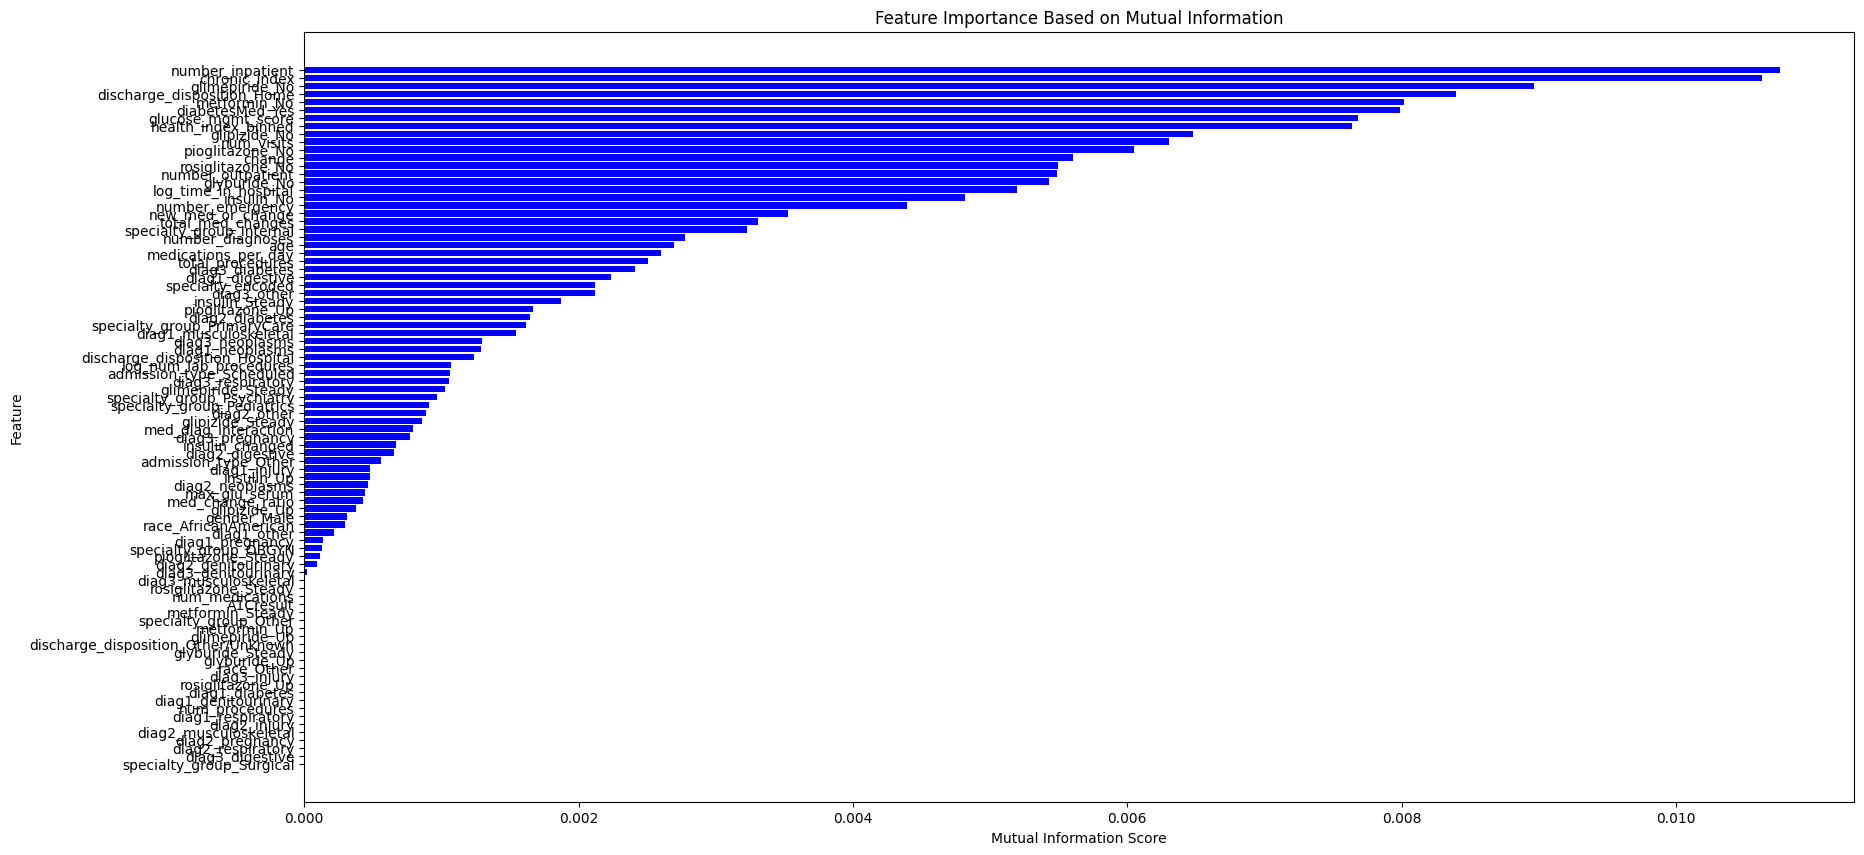

In [92]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE

mi_scores = mutual_info_classif(X, y, discrete_features=False, random_state=42)
# Convert MI scores into a DataFrame for easier visualization
mi_df = pd.DataFrame({'Feature': X.columns, 'MI Score': mi_scores})

# Sort the features by their MI scores in descending order (highest importance first)
mi_df = mi_df.sort_values(by='MI Score', ascending=False)

print("Mutual Information Scores for Features:")
print(mi_df)  # Print the MI scores for each feature


# Create a horizontal bar chart to visualize feature importance
plt.figure(figsize=(20, 10))  # Set figure size
plt.barh(mi_df['Feature'], mi_df['MI Score'], color='blue')  # Plot bars

# Add labels and title for better understanding
plt.xlabel("Mutual Information Score")  # Label for x-axis
plt.ylabel("Feature")  # Label for y-axis
plt.title("Feature Importance Based on Mutual Information")  # Chart title

# Invert y-axis so that the most important feature is at the top
plt.gca().invert_yaxis()  

# Show the plot
plt.show()


In [93]:

from sklearn.feature_selection import SelectKBest, mutual_info_classif


# Separate features and target
y = df['readmitted']
X = df.drop(columns='readmitted')

# Initialise the selector
selector = SelectKBest(score_func=mutual_info_classif, k=70)

# Fit to the data
X_selected = selector.fit_transform(X, y)


selected_features = X.columns[selector.get_support()]
print("Selected Features:")
for feature in selected_features:
    print(f" {feature}")



Selected Features:
 age
 num_procedures
 num_medications
 number_outpatient
 number_emergency
 number_inpatient
 number_diagnoses
 change
 gender_Male
 specialty_encoded
 glucose_mgmt_score
 total_med_changes
 insulin_changed
 metformin_No
 metformin_Steady
 metformin_Up
 glimepiride_No
 glimepiride_Steady
 glipizide_No
 glyburide_No
 pioglitazone_No
 pioglitazone_Up
 rosiglitazone_No
 rosiglitazone_Steady
 rosiglitazone_Up
 insulin_No
 insulin_Steady
 insulin_Up
 diag2_diabetes
 diag2_digestive
 diag2_genitourinary
 diag2_injury
 diag2_musculoskeletal
 diag2_neoplasms
 diag2_other
 diag2_pregnancy
 diag2_respiratory
 diag3_diabetes
 diag3_digestive
 diag3_genitourinary
 diag3_injury
 diag3_musculoskeletal
 diag3_neoplasms
 diag3_other
 diag3_pregnancy
 diag3_respiratory
 num_visits
 total_procedures
 log_time_in_hospital
 log_num_lab_procedures
 health_index_binned
 medications_per_day
 med_diag_interaction
 chronic_index
 new_med_or_change
 race_AfricanAmerican
 race_Other
 admission

In [102]:
#Save the column names
X = df.drop(columns='readmitted')
y = df['readmitted']

# Save the expected columns
expected_columns = X.columns.tolist()
joblib.dump(expected_columns, 'expected_columns.pkl')

print(f"Saved {len(expected_columns)} expected columns")
print("First 10 columns:", expected_columns[:10])

Saved 88 expected columns
First 10 columns: ['age', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'change']


In [106]:
import preprocessing
# Test preprocessing
 

# Get a sample patient from your original data
sample_patient = df.iloc[0].to_dict()  # Convert first row to dict

# Process it
processed = preprocessing.preprocess_single_patient(sample_patient)
print("Processed shape:", processed.shape)
print("Expected shape:", X.shape[1])
print("Columns match:", list(processed.columns) == expected_columns)

# Try a prediction
prediction = final_model.predict(processed)
print("Prediction:", prediction)

AttributeError: module 'preprocessing' has no attribute 'preprocess_single_patient'

### PCA

In [ ]:
#Pca without training and testing
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
pca = PCA(n_components=50)
pca_result = pca.fit_transform(scaled_data)
pca_df = pd.DataFrame(pca_result, columns = [i+1 for i in range(50)])
print(pca_df)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

y = df['readmitted']
X = df.drop(columns='readmitted')


# 2. Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 3. Standardize the features
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled  = scaler.transform(X_test)
target_names = df['readmitted'].unique()



# 4. PCA Training Phase (learning the components)
n_components = 2
pca = PCA(n_components=n_components)
pca.fit(X_train_scaled)          # fit PCA on the training data


# 5. PCA Projection Phase (applying to data)
X_train_pca = pca.transform(X_train_scaled)
X_test_pca  = pca.transform(X_test_scaled)


# 6. Visualize the 2D projection of the training data
df_train = pd.DataFrame(X_train_pca, columns=['PC1', 'PC2'])
df_train['readmitted'] = y_train

plt.figure(figsize=(8, 6))
for i, target_name in enumerate(target_names):
    mask = df_train['readmitted'] == i
    plt.scatter(
        df_train.loc[mask, 'PC1'],
        df_train.loc[mask, 'PC2'],
        label=target_name
    )
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Readmitted Patients')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


The plot above shows us that both readmitted and non-readmitted patients are similarly placed within a 2D euclidean space

In [ ]:
# Scree Plot
# 1. Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
# 2. Standardise the features
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled  = scaler.transform(X_test)


# 3. PCA Training Phase (learning the components)
n_components = 50

pca = PCA(n_components=n_components)
pca.fit(X_train_scaled)  # fit PCA on the training data

# 4. PCA Projection Phase (applying to data)
X_train_pca = pca.transform(X_train_scaled)
X_test_pca  = pca.transform(X_test_scaled)


# 6. Visualize the 2D projection of the training data
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_components + 1), pca.explained_variance_ratio_, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot: Variance Explained by Each Principal Component')
plt.grid(True)
plt.tight_layout()
plt.show()



## Modelling 

In [94]:
#1 Shuffle the data incase there was an order. 
df = df.sample(n = len(df), random_state = 42)
df = df.reset_index(drop = True)
df.head()

,age,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,change,...,discharge_disposition_Hospital,discharge_disposition_Other/Unknown,diabetesMed_Yes,specialty_group_Internal,specialty_group_OBGYN,specialty_group_Other,specialty_group_Pediatrics,specialty_group_PrimaryCare,specialty_group_Psychiatry,specialty_group_Surgical
0,65,0,4,0.707107,0.707107,0.707107,5,0,0,1,...,0,0,1,1,0,0,0,0,0,0
1,75,6,23,0.707107,0.707107,0.707107,9,0,0,1,...,0,0,1,0,0,1,0,0,0,0
2,55,0,9,0.707107,1.224745,0.707107,7,0,3,1,...,0,0,1,0,0,0,0,1,0,0
3,35,0,6,0.707107,0.707107,0.707107,5,0,3,0,...,0,0,1,1,0,0,0,0,0,0
4,75,0,18,1.870829,0.707107,1.224745,6,0,0,1,...,0,0,1,1,0,0,0,0,0,0


Fold 1: Accuracy: 0.6529, ROC AUC: 0.6460, Recall: 0.5576
Fold 2: Accuracy: 0.6510, ROC AUC: 0.6421, Recall: 0.5326
Fold 3: Accuracy: 0.6589, ROC AUC: 0.6331, Recall: 0.5318
Fold 4: Accuracy: 0.6555, ROC AUC: 0.6448, Recall: 0.5309
Fold 5: Accuracy: 0.6608, ROC AUC: 0.6508, Recall: 0.5376


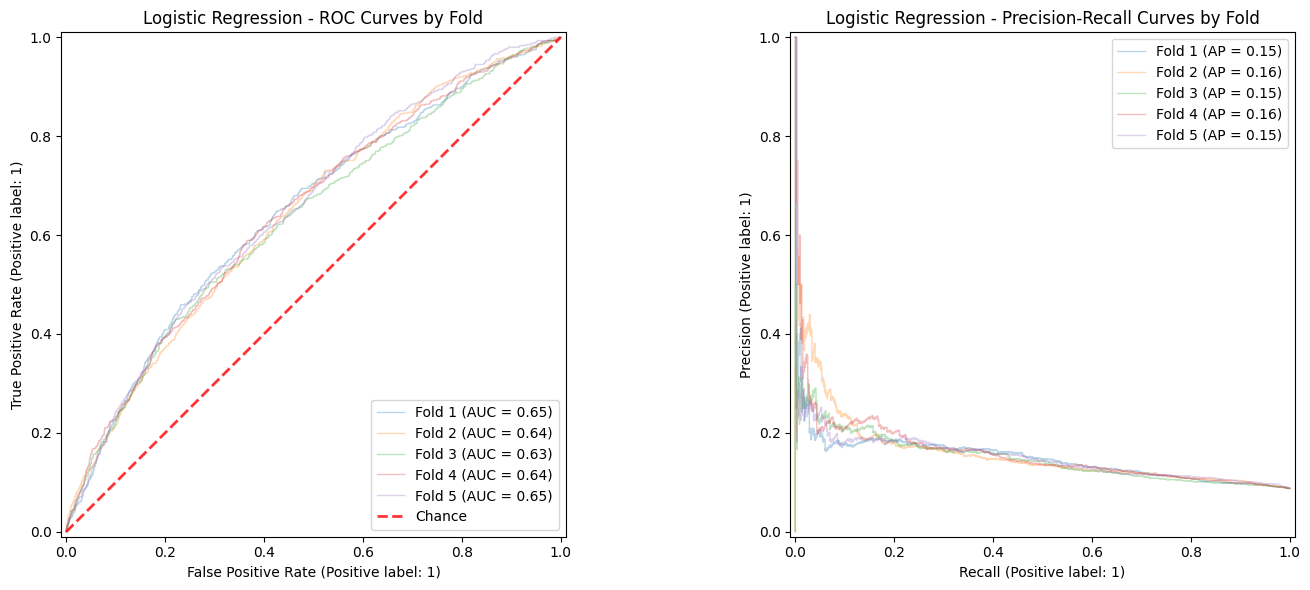


Best Parameters Overall (based on average performance):
classifier__C: 1
classifier__penalty: l1
classifier__solver: liblinear


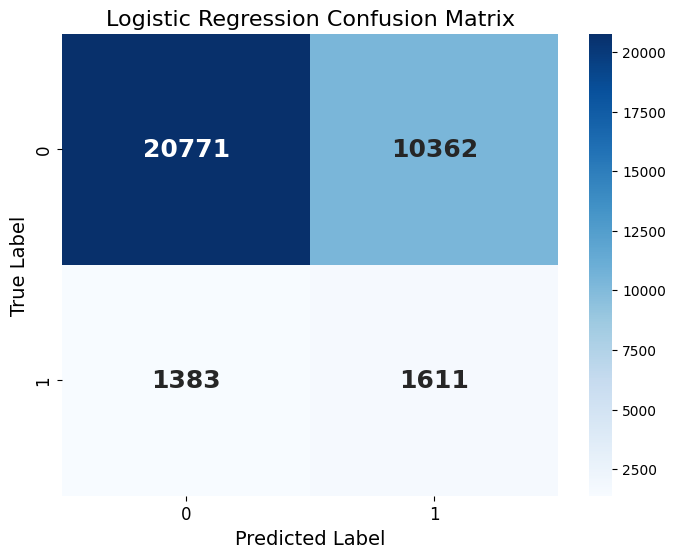


Logistic Regression Average Results:
Accuracy: 0.6558 ± 0.0036
ROC AUC: 0.6434 ± 0.0059
Recall: 0.5381 ± 0.0100
F1 Score: 0.2153 ± 0.0032
Overall ROC AUC (on all predictions): 0.6433
Fold 1: Accuracy: 0.6713, ROC AUC: 0.6521, Recall: 0.5509
Fold 2: Accuracy: 0.6883, ROC AUC: 0.6405, Recall: 0.4975
Fold 3: Accuracy: 0.6763, ROC AUC: 0.6345, Recall: 0.5000
Fold 4: Accuracy: 0.6990, ROC AUC: 0.6459, Recall: 0.4908
Fold 5: Accuracy: 0.6826, ROC AUC: 0.6483, Recall: 0.5042


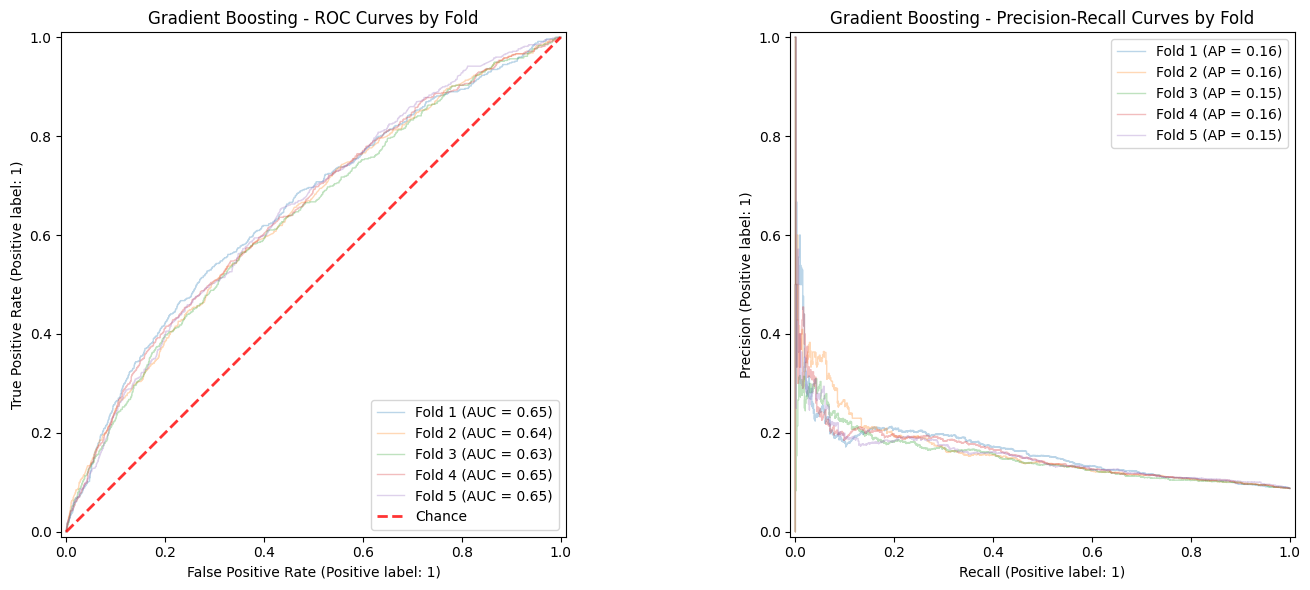


Best Parameters Overall (based on average performance):
classifier__learning_rate: 0.05
classifier__n_estimators: 100


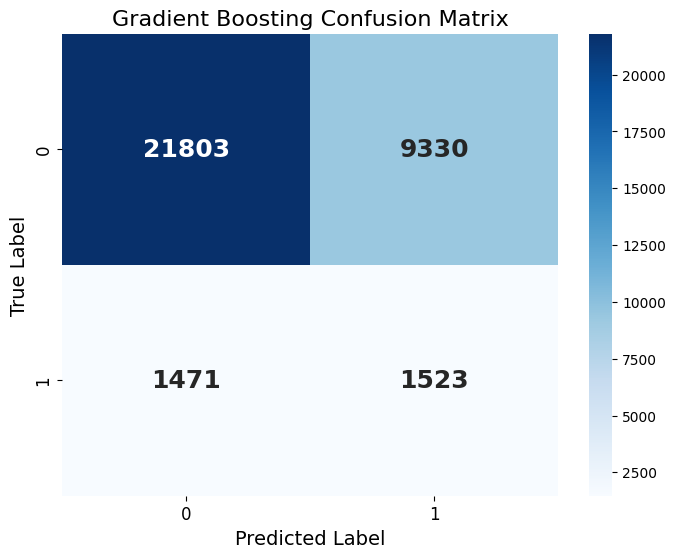


Gradient Boosting Average Results:
Accuracy: 0.6835 ± 0.0097
ROC AUC: 0.6443 ± 0.0061
Recall: 0.5087 ± 0.0216
F1 Score: 0.2199 ± 0.0048
Overall ROC AUC (on all predictions): 0.6436
Fold 1: Accuracy: 0.6858, ROC AUC: 0.6420, Recall: 0.5075
Fold 2: Accuracy: 0.6710, ROC AUC: 0.6437, Recall: 0.5342
Fold 3: Accuracy: 0.6794, ROC AUC: 0.6389, Recall: 0.5067
Fold 4: Accuracy: 0.6848, ROC AUC: 0.6472, Recall: 0.5159
Fold 5: Accuracy: 0.6864, ROC AUC: 0.6466, Recall: 0.4875


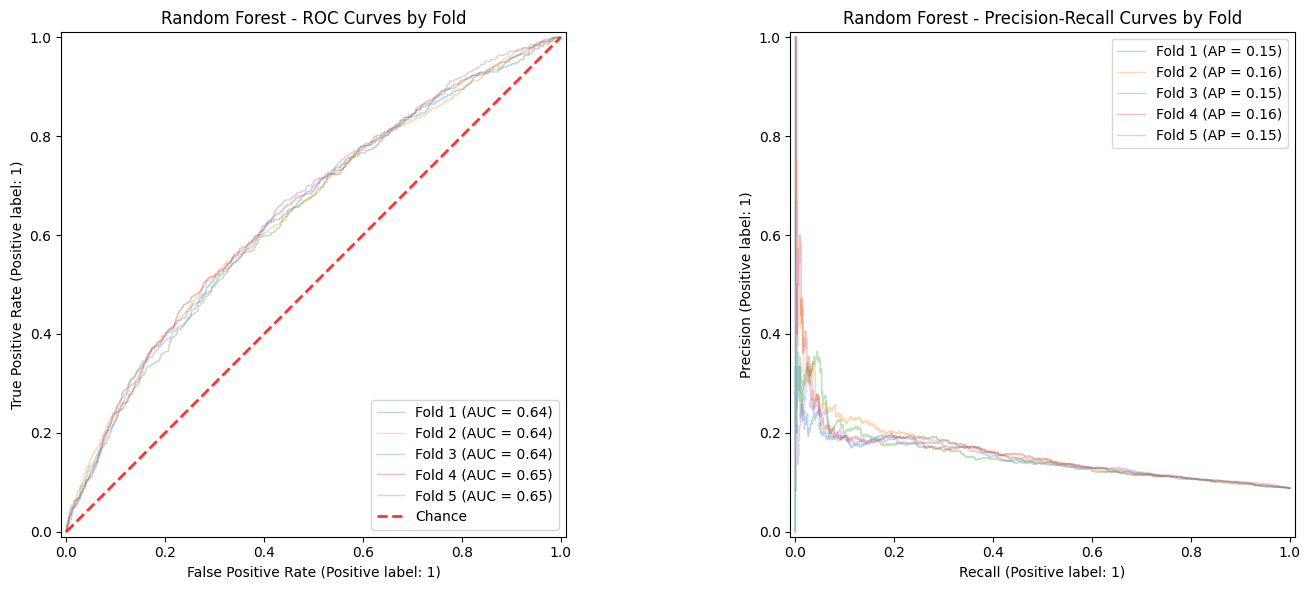


Best Parameters Overall (based on average performance):
classifier__max_depth: 5
classifier__n_estimators: 300


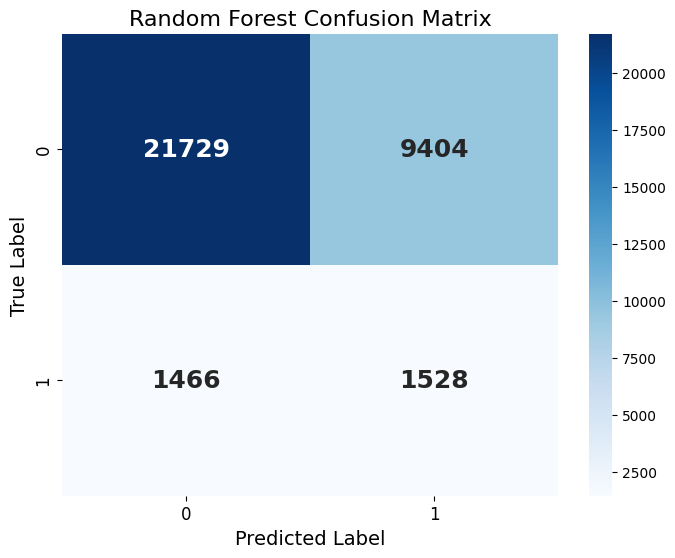


Random Forest Average Results:
Accuracy: 0.6815 ± 0.0058
ROC AUC: 0.6437 ± 0.0030
Recall: 0.5104 ± 0.0151
F1 Score: 0.2194 ± 0.0033
Overall ROC AUC (on all predictions): 0.6434
Logistic Regression  | Accuracy: 0.6558 | ROC AUC: 0.6434 | Recall: 0.5381 | F1: 0.2153 | Overall ROC AUC: 0.6433
Gradient Boosting    | Accuracy: 0.6835 | ROC AUC: 0.6443 | Recall: 0.5087 | F1: 0.2199 | Overall ROC AUC: 0.6436
Random Forest        | Accuracy: 0.6815 | ROC AUC: 0.6437 | Recall: 0.5104 | F1: 0.2194 | Overall ROC AUC: 0.6434


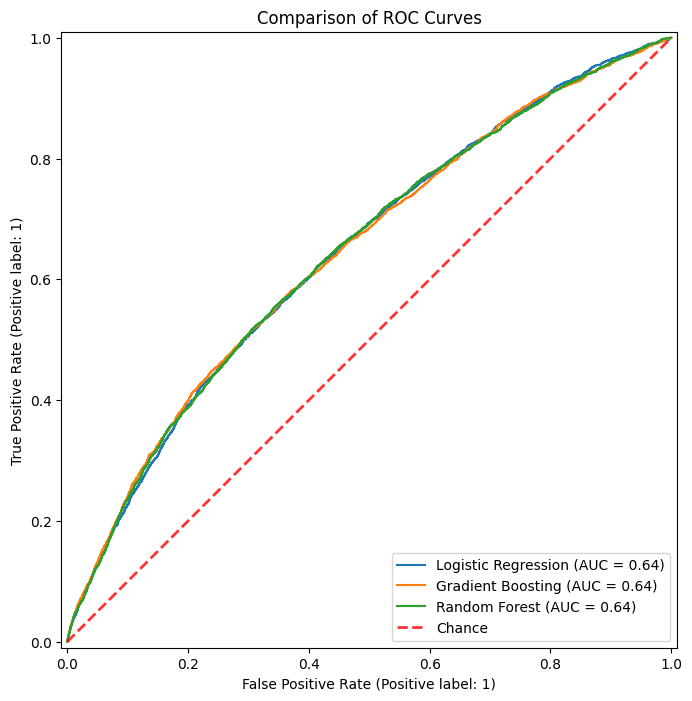

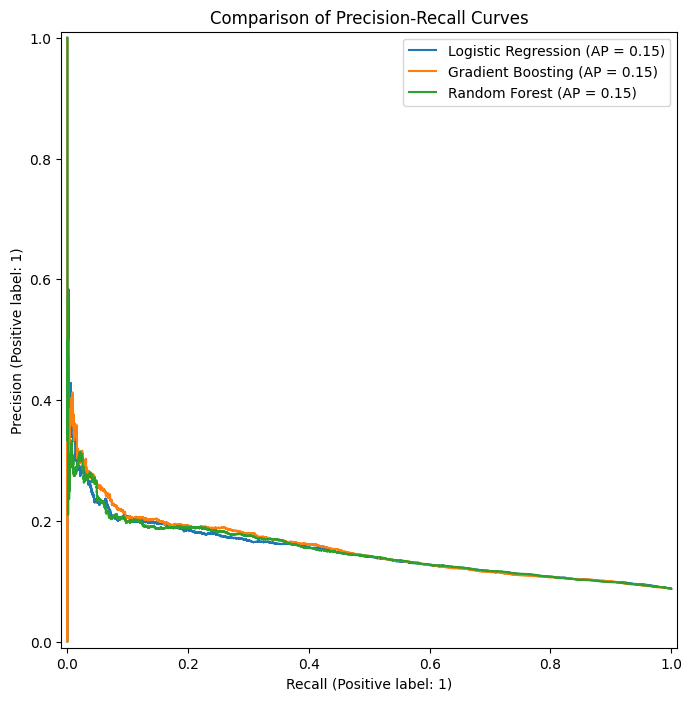

In [95]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, RocCurveDisplay, PrecisionRecallDisplay, f1_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from collections import defaultdict
import seaborn as sns
from sklearn.metrics import recall_score


# Set up cross validation
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
inner_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Hyperparameter grids 
param_grids = {
    'logistic': {
        'classifier__C': [0.1,1,10],               
        'classifier__penalty': ['l1', 'l2'],         
        'classifier__solver': ['liblinear']

    },
    'random_forest': {
        'classifier__n_estimators': [100,200,300], 
        'classifier__max_depth': [2,5,10],         
    },
    'gradient_boosting': {
        'classifier__learning_rate': [0.01, 0.05, 0.1], 
        'classifier__n_estimators': [50,100,150]   
    }
}

# Evaluation function
def evaluate_model(X, y, model, param_grid, model_name):
    # No scaling for tree-based models
    if model_name.lower() in ['random_forest', 'gradient_boosting']:
        pipeline = Pipeline([
            ('classifier', model)
        ])
    else:
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('classifier', model)
        ])
    
    outer_scores = []
    best_params = []
    all_cv_results = [] 
    all_y_true = []
    all_y_pred = []
    all_y_proba = []
    
    # Create figure for ROC and PR curves
    plt.figure(figsize=(15, 6))
    
    for fold_idx, (train_idx, test_idx) in enumerate(outer_cv.split(X, y)):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
        
        # Inner CV for hyperparameter tuning
        grid_search = GridSearchCV(
            pipeline,
            param_grid,
            cv=inner_cv,
            scoring='roc_auc',
            n_jobs=-1
        )

        if model_name.lower() == 'gradient boosting':
            weights = compute_sample_weight(class_weight='balanced', y=y_train)
            grid_search.fit(X_train, y_train, classifier__sample_weight=weights)
        else:
            grid_search.fit(X_train, y_train)

        all_cv_results.append(grid_search.cv_results_)
            
        # Get best model and evaluate
        best_model = grid_search.best_estimator_
        y_pred = best_model.predict(X_test)
        y_proba = best_model.predict_proba(X_test)[:, 1]
        
        # Store for overall metrics
        all_y_true.extend(y_test)
        all_y_pred.extend(y_pred)
        all_y_proba.extend(y_proba)
            
        # Store metrics
        accuracy = accuracy_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_proba)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)  # <- Add this line
        outer_scores.append({'accuracy': accuracy, 'roc_auc': roc_auc, 'recall': recall, 'f1': f1}) 
        best_params.append(grid_search.best_params_)
        
        # Plot ROC and PR curves for this fold
        plt.subplot(1, 2, 1)
        RocCurveDisplay.from_predictions(y_test, y_proba, name=f'Fold {fold_idx+1}', alpha=0.3, lw=1, ax=plt.gca())
        
        plt.subplot(1, 2, 2)
        PrecisionRecallDisplay.from_predictions(y_test, y_proba, name=f'Fold {fold_idx+1}', alpha=0.3, lw=1, ax=plt.gca())
        
        print(f"Fold {fold_idx+1}: Accuracy: {accuracy:.4f}, ROC AUC: {roc_auc:.4f}, Recall: {recall:.4f}")

    
    # Finalize ROC and PR curves plot
    plt.subplot(1, 2, 1)
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)
    plt.title(f'{model_name} - ROC Curves by Fold')
    plt.legend(loc="lower right")
    
    plt.subplot(1, 2, 2)
    plt.title(f'{model_name} - Precision-Recall Curves by Fold')
    plt.legend(loc="upper right")
    
    plt.tight_layout()
    plt.show()
                    
    # Aggregate all parameter combinations and their scores across all outer folds
    param_scores = defaultdict(list)

    for cv_result in all_cv_results:
        for params, score in zip(cv_result['params'], cv_result['mean_test_score']):
            key = tuple(params.items())
            param_scores[key].append(score)

    # Calculate average score for each parameter combination
    avg_param_scores = {params: np.mean(scores) for params, scores in param_scores.items()}

    # Get params with highest average score
    best_avg_params = max(avg_param_scores.items(), key=lambda x: x[1])
    best_overall_params = dict(best_avg_params[0])

    print("\nBest Parameters Overall (based on average performance):")
    for param, value in best_overall_params.items():
        print(f"{param}: {value}")
    
    # Overall confusion matrix
    overall_cm = confusion_matrix(all_y_true, all_y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(
        overall_cm, 
        annot=True, 
        fmt='d', 
        cmap='Blues', 
        annot_kws={"size": 18, "weight": "bold"}  # Bigger and bold numbers
    )
    plt.title(f'{model_name} Confusion Matrix', fontsize=16)
    plt.ylabel('True Label', fontsize=14)
    plt.xlabel('Predicted Label', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()
    
    # Overall ROC AUC
    overall_roc_auc = roc_auc_score(all_y_true, all_y_proba)
    
    # Aggregate results
    avg_accuracy = np.mean([s['accuracy'] for s in outer_scores])
    avg_roc_auc = np.mean([s['roc_auc'] for s in outer_scores])
    avg_recall = np.mean([s['recall'] for s in outer_scores])
    avg_f1 = np.mean([s['f1'] for s in outer_scores]) 
    
    print(f"\n{model_name} Average Results:")
    print(f"Accuracy: {avg_accuracy:.4f} ± {np.std([s['accuracy'] for s in outer_scores]):.4f}")
    print(f"ROC AUC: {avg_roc_auc:.4f} ± {np.std([s['roc_auc'] for s in outer_scores]):.4f}")
    print(f"Recall: {avg_recall:.4f} ± {np.std([s['recall'] for s in outer_scores]):.4f}")
    print(f"F1 Score: {avg_f1:.4f} ± {np.std([s['f1'] for s in outer_scores]):.4f}")  # <- Add this line

    print(f"Overall ROC AUC (on all predictions): {overall_roc_auc:.4f}")

    return {
        'model_name': model_name,
        'avg_accuracy': avg_accuracy,
        'avg_roc_auc': avg_roc_auc,
        'avg_recall': avg_recall,
        'avg_f1': avg_f1,
        'overall_roc_auc': overall_roc_auc,
        'best_params': best_params,
        'all_scores': outer_scores,
        'best_overall_params': best_overall_params,
        'y_true': all_y_true,
        'y_proba': all_y_proba
    }

models = {
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=5000, class_weight='balanced', solver = 'saga'),
    'Random Forest': RandomForestClassifier(random_state=42, n_jobs=-1, class_weight='balanced'),
}


X = df.drop(columns='readmitted')
y=df['readmitted']


results = []

lr_result = evaluate_model(X, y, models['Logistic Regression'], param_grids['logistic'], 'Logistic Regression')
results.append(lr_result)


gb_result = evaluate_model(X, y, models['Gradient Boosting'], param_grids['gradient_boosting'], 'Gradient Boosting')
results.append(gb_result)

rf_result = evaluate_model(X, y, models['Random Forest'], param_grids['random_forest'], 'Random Forest')
results.append(rf_result)


for result in results:
    print(f"{result['model_name']:20} | Accuracy: {result['avg_accuracy']:.4f} | ROC AUC: {result['avg_roc_auc']:.4f} | Recall: {result['avg_recall']:.4f} | F1: {result['avg_f1']:.4f} | Overall ROC AUC: {result['overall_roc_auc']:.4f}")


#  Plot combined ROC curves for all models
plt.figure(figsize=(10, 8))
for result in results:
    RocCurveDisplay.from_predictions(
        result['y_true'],
        result['y_proba'],
        name=result['model_name'],
        ax=plt.gca()
    )
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)
plt.title('Comparison of ROC Curves')
plt.legend(loc="lower right")
plt.show()

# Plot combined Precision-Recall curves for all models
plt.figure(figsize=(10, 8))
for result in results:
    PrecisionRecallDisplay.from_predictions(
        result['y_true'],
        result['y_proba'],
        name=result['model_name'],
        ax=plt.gca()
    )
plt.title('Comparison of Precision-Recall Curves')
plt.legend(loc="upper right")
plt.show()



In [96]:
total = len(df)
counts = df['readmitted'].value_counts()
percent_1 = counts.get(1, 0) / total * 100
percent_0 = counts.get(0, 0) / total * 100

print(f"Percentage of 1: {percent_1:.2f}%")
print(f"Percentage of 0: {percent_0:.2f}%")



Percentage of 1: 8.77%
Percentage of 0: 91.23%


In [98]:
import joblib

# Get the best parameters from your gradient boosting results
best_params = gb_result['best_overall_params']

# Extract the actual parameter values (remove 'classifier__' prefix)
learning_rate = best_params['classifier__learning_rate']
n_estimators = best_params['classifier__n_estimators']

# Create final model with best hyperparameters
final_model = GradientBoostingClassifier(
    random_state=42,
    learning_rate=learning_rate,
    n_estimators=n_estimators
)

# Train on ALL data (not just CV folds)
weights = compute_sample_weight(class_weight='balanced', y=y)
final_model.fit(X, y, sample_weight=weights)

# Save the model
joblib.dump(final_model, 'gradient_boosting_model.pkl')

print(f"Model saved with parameters:")
print(f"  Learning rate: {learning_rate}")
print(f"  N estimators: {n_estimators}")
print("Model file: gradient_boosting_model.pkl")


Model saved with parameters:
  Learning rate: 0.05
  N estimators: 100
Model file: gradient_boosting_model.pkl


In [99]:
# Test that it loads correctly
# Test loading
loaded_model = joblib.load('gradient_boosting_model.pkl')

# Make a test prediction on first row
test_pred = loaded_model.predict(X.iloc[:1])
test_proba = loaded_model.predict_proba(X.iloc[:1])

print(f"Test prediction: {test_pred[0]}")
print(f"Test probability: {test_proba[0]}")

Test prediction: 0
Test probability: [0.59270098 0.40729902]
